# Data Preparation


In [147]:
# DS18 ML Essentials project
# Module 1: Data Preparation

# Submitted by: Tzvi Eliezer Nir
# mail: tzvienir@gmail.com
# Date: 05/03/2025

## First Impression

In this section we will load the dataset and see its basic structure: columns characteristics, shape, nulls, duplicates etc.

The reasons we do this simple analysis now is to find where the data needs some preprocessing done - merging tables, handeling textual and categorical columns and more.

We will NOT however do any visual or computational EDA since this section is about prepering the dataset **to** the EDA.

### Load the dataset

In [148]:
import pandas as pd

In [149]:
df = pd.read_csv('data/spotify_songs.csv')

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Dataset properties

Lets have a look at the dataset shape and the type of each column using `df.shape()`,`df.info()`:

In [150]:
df.shape

(32833, 23)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

As we can see, There is a significant amount of `object`-type columns which we will have to handle.

Yet, there are plenty of numerical columns both `int` and `float`. Lets have a look at the values of this columns using `df.describe()`:

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


From the look of it, each of the numerical columns has a meaningful data with its own distribution.

### Find duplicate tracks

To avoid giving a single track more weight than the others, we want to find duplicated instances of the same track and make sure only one stays after the preparation.

For now let just find the duplicated tracks without throwing them, since there is still data to extract from the duplicated rows as we will see shortly.

We will filter the dataset using `df.duplicated`:

In [153]:
# Identify duplicate track_id values
duplicates = df[df.duplicated(subset=["track_id"], keep=False)]

# Sort by track_id
duplicates_sorted = duplicates.sort_values(by="track_id")

# Save the sorted duplicates to a new CSV file (optional)
duplicates_sorted.to_csv("data/duplicate_tracks_sorted.csv", index=False)

# Display the sorted duplicate rows
duplicates_sorted

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32084,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,10,-4.894,1,0.0421,0.0249,0.000000,0.3610,0.134,130.001,188000
28696,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Big Room EDM - by Spinnin' Records,7xWdFCrU5Gka6qp1ODrSdK,edm,...,10,-4.894,1,0.0421,0.0249,0.000000,0.3610,0.134,130.001,188000
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,8,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,8,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893
9387,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,RAP Gangsta,1Z1gW89x4MSBjkvVjGg7DQ,rap,...,8,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32074,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,5,-4.755,1,0.1130,0.0512,0.000315,0.2340,0.415,127.964,204375
28932,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Bounce United,08QTrfsYYouffgnPjmllAQ,edm,...,5,-4.755,1,0.1130,0.0512,0.000315,0.2340,0.415,127.964,204375
2850,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,ElectroPop 2020,4frhr6RQM2fMOm2mpvOVo6,pop,...,6,-5.092,0,0.0432,0.0736,0.000000,0.1560,0.501,92.943,185360
30939,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,6,-5.092,0,0.0432,0.0736,0.000000,0.1560,0.501,92.943,185360


### Examining the duplicate values

A short look at the `duplicated` dataframe will show us that even though we filtered for duplicated `track_id` values, all `track_*` and `album_*` values are duplicated as well for the same `track_id` (and the track musical properties).

The differences are in the `playlist` features - the same track may appear in different playlists - creating duplicate entries for the track.

This is important, because it means all we need to do to "merge" the duplicated entries is to handle just the few `playlist` features.

## Clean Text

In this section we will remove free-text categories to a separate `df_text` dataframe.
This is crucial for the `playlist_name` column as its value may contain Emojis and other wildcard characters, but it is also useful to deal with `track_name` and `album_name`, and since those names are uniquley belongs to an ID we aren't loosing this data - we can always join back the tables based on the ID!

In [154]:
df_text = df[['track_id', 'track_name', 'track_artist', 'track_album_name', 'playlist_name']].copy()
df = df.drop(columns=['track_name', 'track_artist', 'track_album_name', 'playlist_name'])

## Drop `playlist_id`

Since we are predicting the **track** popularity, we have no need to know about the playlist.

Sure, we will extract useful data like genre from the playlist properties, but when it comes to playlist name or ID - those values are not giving us any value to the question at hand (track popularity).

And yet, while the ID is not interesting, counting the appearances of each track in the provided playlists may be useful and predict popularity.

Lets add a column for number of playlist appearances:

In [155]:
df["playlist_count"] = df.groupby("track_id")["track_id"].transform("count")

Now we can drop the playlist ID from the `df`:

In [156]:
df = df.drop(columns=['playlist_id'])

## Genre encoding

### Motivation

After handling the `playlist_name` and `playlist_genre` column, all that left to deal with are the genres columns - and we can start merging the duplicated rows!

Tracks appears in multiple playlists, usually have multiple associated genres - one from each playlist. By encoding the generes we will get replace the `playlist_genre` column with encoded colmuns that will make it possible to merge the rows without loosing data.

### Genres overview

There are two genres columns - `playlist_genre` and `playlist_subgenre`. First lets get some idea on the data stored in those columns:

In [157]:
genre_counts = df['playlist_genre'].value_counts()
subgenre_counts = df['playlist_subgenre'].value_counts()

print("Playlist Genre Counts:")
display(genre_counts)
print(f"There are {len(genre_counts)} MAIN genres") # 6

print("\nPlaylist Subgenre Counts:")
display(subgenre_counts)
print(f"There are {len(subgenre_counts)} SUB genres") # 24

Playlist Genre Counts:


playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

There are 6 MAIN genres

Playlist Subgenre Counts:


playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

There are 24 SUB genres


### Strategy

There are six main genres, and 24 subgenres.

We are going to do the encoding in **two phases**:

1. We will use dummy encoding for the six main geners-
   we will create six new binary categories, each represents whether or not
   the track belongs to the genre.

   Duplicate tracks with different `playlist_genre` will be set to `1` in all associated genres.

2. We will not just throw the sub genres as we might find some usable information in there.
   
   For example, if a track has a main genre `rap` but a sub-genre **`hip pop`** (not **`hip hop`**!)
   we can use this information to associtae the track with the `pop` genre as well (the `pop` dummy category will be `1`).

3. I will create a simple report to show how much the second phase changed the data.

### Encoding Genres

Lets start with the dummy-encoding of each genre:

In [ ]:
# Perform one-hot encoding
df_genre_encoded = pd.get_dummies(df['playlist_genre'], dtype=int)

# Merge with original dataframe
df = pd.concat([df, df_genre_encoded], axis=1)

# Drop the original column
df = df.drop(columns=['playlist_genre'])

df_temp = df.sort_values("track_id")
df_temp.to_csv("data/temp.csv", index=False)





As mentioned earlier, I want to see how much the second encoding phase changed the data, so I will save the sum of "1" in each genre after the first phase.

To get a valid report, we need to aggregate the duplicate rows and count their "1" in each genre.
Since we didn't handle the subgenre yet, aggregating the original `df` will loose us some subgenre data - so we do this aggreagation in a copied dataset.

Lets create the report:

In [ ]:
# Handle duplicate tracks by aggregating (assuming 'track_id' uniquely identifies tracks)
df_copy = df.groupby('track_id', as_index=False).max()

# Count the number of tracks where each genre dummy column is 1
genre_track_counts = df_copy[['edm', 'rap', 'pop', 'r&b', 'latin', 'rock']].sum().to_dict()

# Print the results
print(genre_track_counts)

{'edm': 6808, 'rap': 8078, 'pop': 8339, 'r&b': 5138, 'latin': 4641, 'rock': 4451}


(28356, 24)

### Handling sub-genres

As mentioned before, the sub genre column can help us more genres the track is associated with. The `playlist_genre` column force each track to have a single genre, but a track with sub-genre `pop edm` undoubtly belongs to both genres. And now after we have done dummy encoding we can set "1" to both genres - this is a some valuable data!

Below you can find a dictionary mapping a sub-genre to its main genres:

In [160]:
subgenre_to_genre = {
    "progressive electro house": ["edm"],
    "southern hip hop": ["rap"],
    "indie poptimism": ["pop"],
    "latin hip hop": ["latin", "rap"],
    "neo soul": ["r&b"],
    "pop edm": ["pop", "edm"],
    "electro house": ["edm"],
    "hard rock": ["rock"],
    "gangster rap": ["rap"],
    "electropop": ["pop", "edm"],
    "urban contemporary": ["r&b"],
    "hip hop": ["rap"],
    "dance pop": ["pop"],
    "classic rock": ["rock"],
    "trap": ["rap"],
    "tropical": ["latin"],
    "latin pop": ["latin", "pop"],
    "hip pop": ["pop", "rap"],
    "big room": ["edm"],
    "new jack swing": ["r&b"],
    "post-teen pop": ["pop"],
    "permanent wave": ["rock"],
    "album rock": ["rock"],
    "reggaeton": ["latin"]
}

Now for each track we are gonne make sure that **all** associated genre dummies are set to `1` based on the sub-genre mapping:

In [162]:
# Ensure all tracks have the correct genre dummies based on their subgenre
for subgenre, main_genres in subgenre_to_genre.items():
    df.loc[df['playlist_subgenre'] == subgenre, main_genres] = 1

Next, we can finally aggregate the duplicated data!

In [163]:
df = df.groupby('track_id', as_index=False).max()

Last, lets count the `1`'s in each genre after updating the dummy colmuns using the sub-genre data:

In [166]:
# Count the number of tracks where each genre dummy column is 1
genre_subgenre_track_counts = df[['edm', 'rap', 'pop', 'r&b', 'latin', 'rock']].sum().to_dict()

# Print the results
print(genre_subgenre_track_counts)

{'edm': 6808, 'rap': 8078, 'pop': 8339, 'r&b': 5138, 'latin': 4641, 'rock': 4451}




Lets show on a Bar Plot the amount of tracks in each genre before/after extracting additional genres from the sub-genres:

*(I know i promised no visual EDA, but this is more about visualizing the changes in the dataset, not the data itself, so frogive me this time...)*

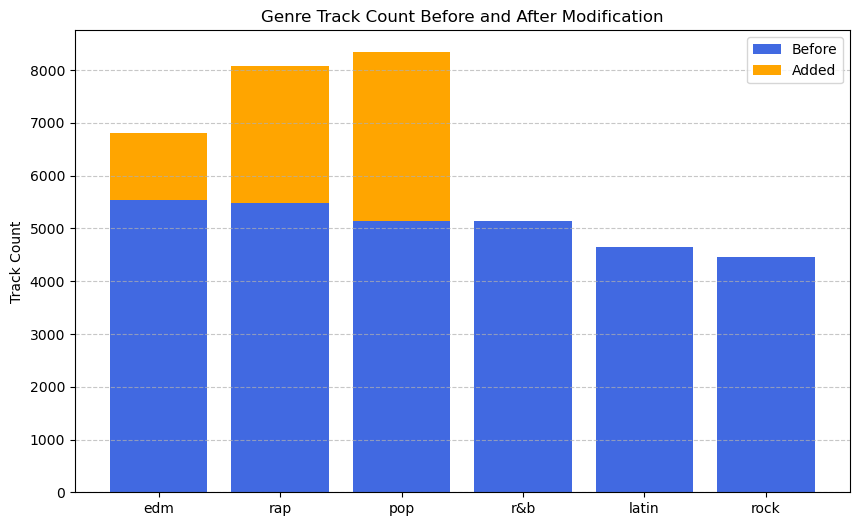

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Data
genres = ['edm', 'rap', 'pop', 'r&b', 'latin', 'rock']

# Convert to lists
before_values = np.array([genre_track_counts[g] for g in genres])
after_values = np.array([genre_subgenre_track_counts[g] for g in genres])

# Compute the difference (increase)
increase_values = after_values - before_values

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Base bars (before modification)
ax.bar(genres, before_values, color='royalblue', label='Before')

# Stacked bars (increase after modification)
ax.bar(genres, increase_values, bottom=before_values, color='orange', label='Added')

# Labels and formatting
ax.set_ylabel("Track Count")
ax.set_title("Genre Track Count Before and After Modification")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [168]:
df.shape

(28356, 24)

## TODO:
* playlist subgenre encoding
* Album release date to datetime
* Does artist name belongs to `df_text`? (maybe create an `other` artist?)
* Save to pickle file